## Job Trend Analyzer - Julian Gutierrez

In [1]:
# We need to install beautifulsoup4 first
!pip install beautifulsoup4


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing our libraries now
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

url = "https://remoteok.com/api"
headers = {
    "User-Agent" : "Mozilla/5.0",
    "Accept" : "application/json"
}

response = requests.get(url, headers = headers)

if response.status_code == 200:
    data = response.json()
    if len(data) > 1:
        job_data = data[1:]
        df = pd.DataFrame(job_data)
        print(f"Jobs found: {len(df)}")
        display(df[["date", "position", "company", "location", "tags"]].head(10))
        df.to_csv("data/remoteok_jobs.csv", index = False)
    else:
        print("No job data found.")
else:
    print("Failed to fetch data: ", response.status_code)

Jobs found: 95


,date,position,company,location,tags
0,2025-05-17T13:00:04+00:00,Manager Engineering II Data Pipelines,Ironclad,San Francisco,"[manager, design, hr, docker, technical, softw..."
1,2025-05-16T22:00:03+00:00,Visual Designer,PIP Labs,US,"[design, web3, designer, management, content, ..."
2,2025-05-16T11:00:10+00:00,Marketing Design Intern 2025 Summer Intern,Symmetry Systems,Remote,"[design, security, technical, support, softwar..."
3,2025-05-16T11:00:03+00:00,Lifecycle Marketing Associate,Blueland,Remote,"[support, growth, investment, strategy, manage..."
4,2025-05-16T10:00:03+00:00,Member of Product Trading,Anchorage Digital,United States,"[design, crypto, cryptocurrency, swift, securi..."
5,2025-05-16T00:00:06+00:00,Associate Attorney,EnableComp,,"[training, support, growth, financial, strateg..."
6,2025-05-15T18:00:01+00:00,,,,"[sales, non tech]"
7,2025-05-15T11:41:41+00:00,Member Support Unicorn,Interaction Design Foundation,,"[admin, customer support, social media]"
8,2025-05-15T10:00:03+00:00,Staff Frontend Engineer,Notabene,,"[frontend, design, crypto, cryptocurrency, sys..."
9,2025-05-15T00:00:20+00:00,Staff Machine Learning Engineer,Warner Music Inc.,,"[music, design, system, training, software, cl..."


In [3]:
# Lets dig into the columns that exist within out new dataset.
df.columns.tolist()

['slug',
 'id',
 'epoch',
 'date',
 'company',
 'company_logo',
 'position',
 'tags',
 'logo',
 'description',
 'location',
 'salary_min',
 'salary_max',
 'apply_url',
 'url',
 'original',
 'verified']

In [4]:
# Hone in on some core data.
df[["position", "company", "location", "tags", "description", "date"]]

,position,company,location,tags,description,date
0,Manager Engineering II Data Pipelines,Ironclad,San Francisco,"[manager, design, hr, docker, technical, softw...","<p style=""min-height:1.5em"">Ironclad is the #1...",2025-05-17T13:00:04+00:00
1,Visual Designer,PIP Labs,US,"[design, web3, designer, management, content, ...","<p><span style=""font-size: 16px;"">PIP Labs is ...",2025-05-16T22:00:03+00:00
2,Marketing Design Intern 2025 Summer Intern,Symmetry Systems,Remote,"[design, security, technical, support, softwar...","<p><span style=""font-size: 32px;"">Overview</sp...",2025-05-16T11:00:10+00:00
3,Lifecycle Marketing Associate,Blueland,Remote,"[support, growth, investment, strategy, manage...","<p><br></p><p><span style=""font-size: 16px;"">B...",2025-05-16T11:00:03+00:00
4,Member of Product Trading,Anchorage Digital,United States,"[design, crypto, cryptocurrency, swift, securi...","<p><span style=""font-size: 18px""><b>At Anchora...",2025-05-16T10:00:03+00:00
...,...,...,...,...,...,...
90,Business Operations Administrator,Anagram,Anywhere,"[support, accounting, payroll, finance, admini...",<p>Anagram is the ultimate insurance billing p...,2025-04-25T12:00:04+00:00
91,Project Coordinator,Lead Bank,Remote,"[design, embedded, training, technical, coordi...",<p>Lead is a fintech building banking infrastr...,2025-04-24T19:00:12+00:00
92,Associate Program Manager,Lead Bank,Remote,"[manager, design, embedded, training, technica...",<p>Lead is a fintech building banking infrastr...,2025-04-24T19:00:02+00:00
93,Venture Capital Social Media Manager,VC Lab,Palo Alto,"[manager, growth, director, voice, investment,...","<p>Decile Group (<a rel=""noopener noreferrer"" ...",2025-04-24T10:00:03+00:00


In [5]:
# As an important part of data exploration, lets see what values are missing. 

print(df.isnull().sum())

slug             0
id               0
epoch            0
date             0
company          0
company_logo     0
position         0
tags             0
logo             0
description      0
location         0
salary_min       0
salary_max       0
apply_url        0
url              0
original        80
verified        86
dtype: int64


In [6]:
# Luckily enough, Nan vales only exist in the original and verified fields, both of which are not essential to the analysis we'll 
# be doing. Therefore lets make df where we drop them.

df_clean = df.drop(columns=["original", "verified"])
df_clean.to_csv("data/clean_remoteok_jobs.csv", index = False)

# No more missing values.

df_clean.isnull().sum()

slug            0
id              0
epoch           0
date            0
company         0
company_logo    0
position        0
tags            0
logo            0
description     0
location        0
salary_min      0
salary_max      0
apply_url       0
url             0
dtype: int64

In [7]:
# One trend that I believe could be critical to analyzing the current market, is the prevelance of which skills are in demand and to do this
# we can use counters

from collections import Counter

all_tags = sum(df_clean["tags"], [])
tag_counts = Counter(all_tags)

# Pulling top 10 most common tags in listings. 

top_tags = tag_counts.most_common(10)

print(f"The top 10 most common tags are: {top_tags}")

The top 10 most common tags are: [('support', 37), ('software', 33), ('management', 33), ('growth', 31), ('digital nomad', 31), ('design', 30), ('engineer', 28), ('technical', 27), ('manager', 22), ('marketing', 20)]


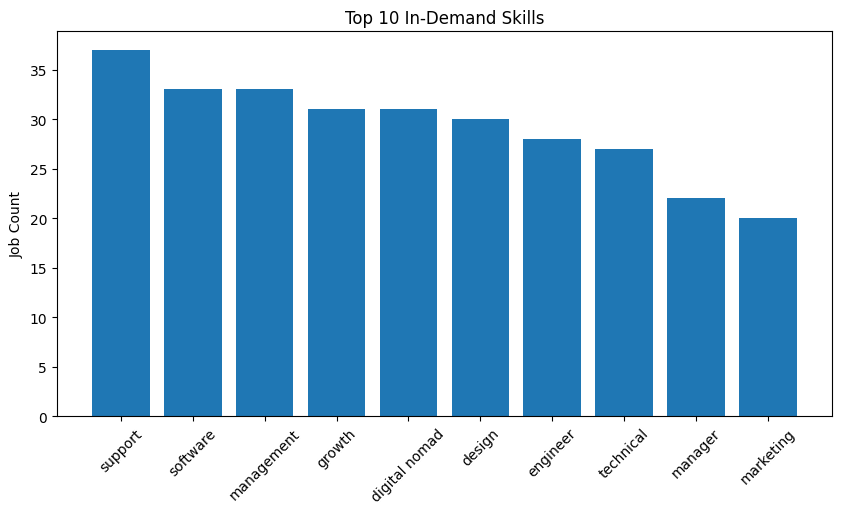

In [8]:
# Lets visualize these tags

import matplotlib.pyplot as plt

tags, counts = zip(*top_tags)
plt.figure(figsize = (10,5))
plt.bar(tags, counts)
plt.title("Top 10 In-Demand Skills")
plt.ylabel("Job Count")
plt.xticks(rotation = 45)
plt.show()

In [9]:
# Another strong point of analysis are which companies are in most need for employees,
# this could help in applying for positions. Let's explore this data 

top_companies = df_clean["company"].value_counts().head(10)

print(top_companies)

company
Contra                                7
Anchorage Digital                     4
Smallstep                             3
Find                                  2
Lead Bank                             2
Tether Operations Limited             2
Firework                              2
Manta Network, Powered by p0x labs    2
Oowlish Technology                    2
BlackCloak                            1
Name: count, dtype: int64


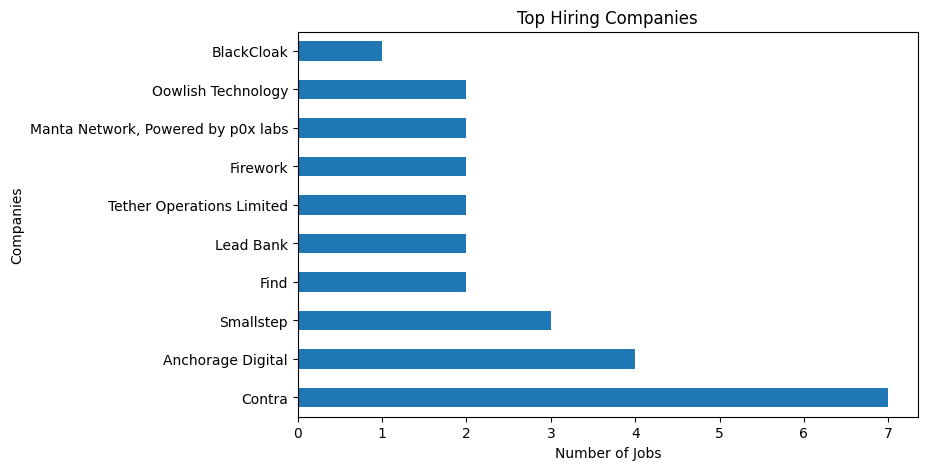

In [10]:
top_companies.plot(kind = "barh", figsize = (8,5), title = "Top Hiring Companies")
plt.ylabel("Companies")
plt.xlabel("Number of Jobs")
plt.show()

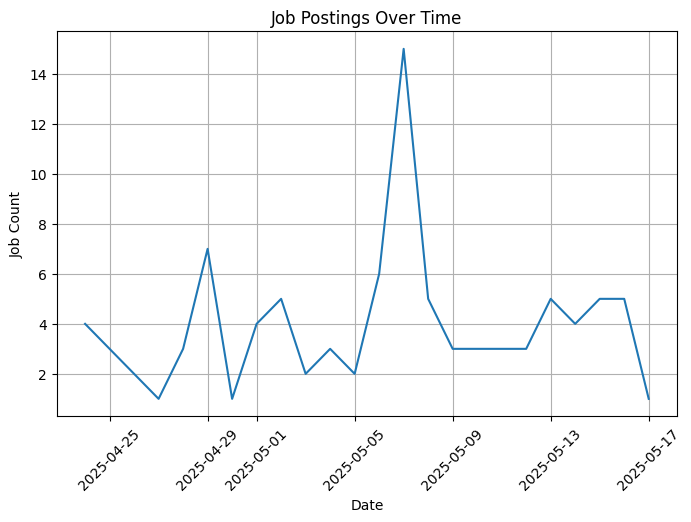

In [11]:
# Lastly another strong trend to analyze is how jobs have changed over time. 
# Lets start looking into this

# Convert the date column.
df_clean["date"] = pd.to_datetime(df_clean["date"])

jobs_by_date = df_clean.groupby(df_clean["date"].dt.date).size()

jobs_by_date.plot(figsize = (8,5), title = "Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Job Count")
plt.xticks(rotation = 45)
plt.grid()
plt.show()